In [1]:
from datetime import date
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from random import random

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'FINANCE Paul Wilmott Introduces Quantitative Finance.pdf',
 'FinSearch Mid-Term.docx',
 'MID TERM REPORT Question.pdf',
 'Predicting future prices of Reliance Stock using Monte Carlo Simulation.ipynb',
 'RELIANCE.csv',
 'Screenshot 2023-07-19 034012.png']

In [3]:
history = pd.read_csv('RELIANCE.csv')
# has data from 2010-01-04 to present (2023-07-18)

In [4]:
history

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,540.427307,540.427307,506.127411,532.700500,482.812469,35372156.0
1,2010-01-05,569.551208,569.551208,527.697937,530.323059,480.657654,9872785.0
2,2010-01-06,534.879883,542.111328,530.298279,538.891846,488.423950,10933743.0
3,2010-01-07,538.891846,552.265076,533.938782,547.832092,496.526978,12090336.0
4,2010-01-08,548.797974,551.670715,542.854309,546.395691,495.225037,6973331.0
...,...,...,...,...,...,...,...
3345,2023-07-12,2766.300049,2802.000000,2761.649902,2767.750000,2767.750000,8645662.0
3346,2023-07-13,2783.899902,2799.000000,2737.250000,2743.000000,2743.000000,6776172.0
3347,2023-07-14,2750.000000,2760.899902,2725.100098,2740.699951,2740.699951,6979790.0
3348,2023-07-17,2747.000000,2815.050049,2728.000000,2796.699951,2796.699951,10254545.0


In [5]:
history.set_index('Date', inplace=True)

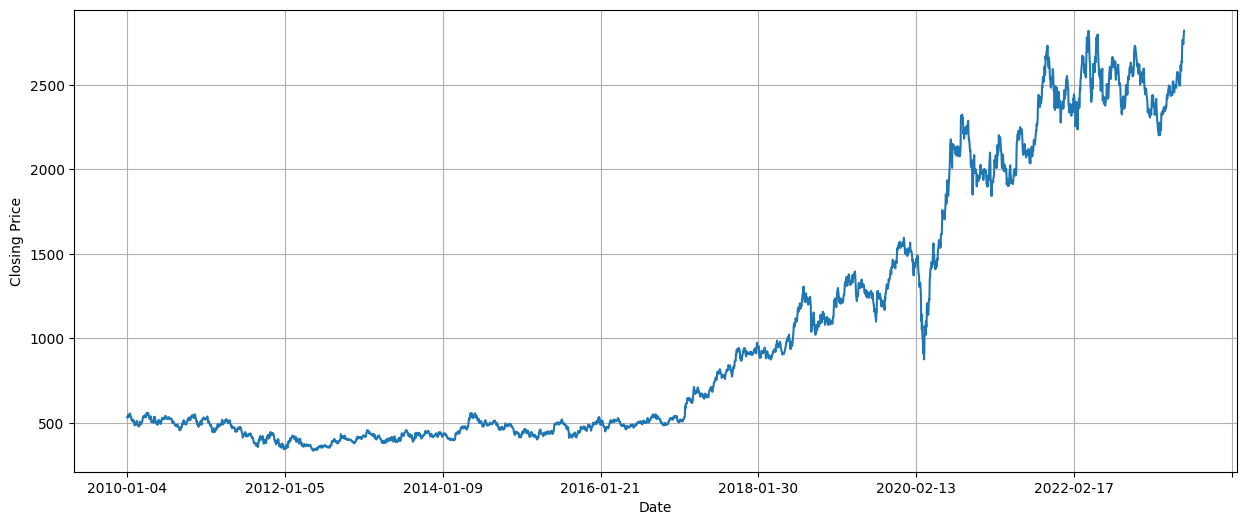

In [6]:
history['Close'].plot(ylabel="Closing Price", figsize=[15,6])
plt.grid()

In [7]:
# total days
days = []
for _ in range(1,len(history['Close'])+1):
    days.append(_)
    
price = history.Close.tolist()
    
# calculating percenetage change
change = history.Close.pct_change().tolist()
change = change[1:]

#statistics
mean = np.mean(change)
std_dev = np.std(change)
print('Mean percent change: ' + str(round(mean*100, 2)) + '%')
print('Standard Deviation of percent change: ' +   
      str(round(std_dev*100, 2)) + '%')

Mean percent change: 0.07%
Standard Deviation of percent change: 1.76%


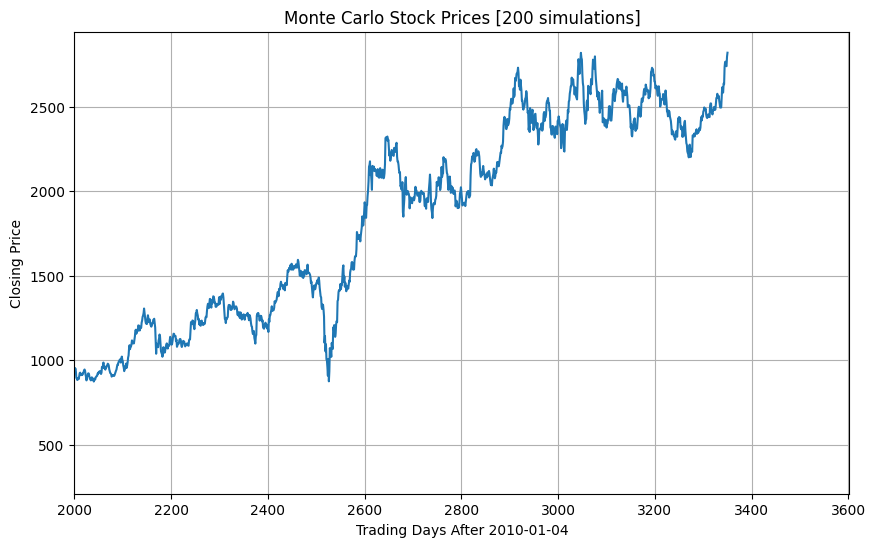

In [8]:
# we will predict for 252 trading days or 1 year
# performing 200 simulations
simulations = 200
days_to_sim = 1*252 # Trading days in 1 year

# Initializing Figure for Simulation
fig = plt.figure(figsize=[10, 6])
plt.plot(days, price)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + 
          " simulations]")
plt.xlabel("Trading Days After 2010-01-04")
plt.ylabel("Closing Price")
plt.xlim([2000, len(days)+days_to_sim])
# setting x limit from 2000th day to visualize the predicted data better
plt.grid()

# Initializing Lists for Analysis
close_end = []
above_close = []


Predicted closing price after 200 simulations: Rs. 6579.71
Predicted percent increase after 1 year: 133.29%
Probability of stock price increasing after 1 year: 132.5%


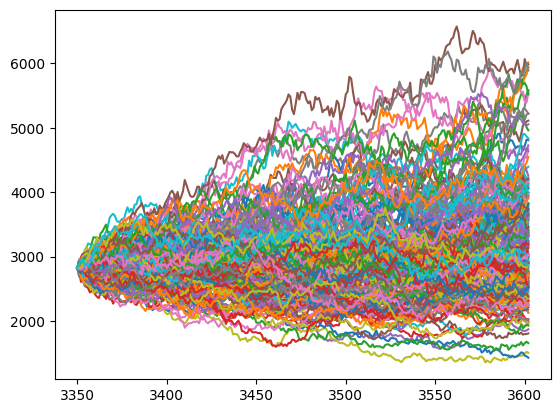

In [10]:
# For Loop for Number of Simulations Desired
for i in range(simulations):
    num_days = [days[-1]]
    close_price = close_price = [history.Close[len(history.Close)-1]]
    
    # For Loop for Number of Days to Predict
    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    
    plt.plot(num_days, close_price)
    
# The ppf function takes a randomized probability
# our mean and standard deviation (calculated earlier),
# and generates a percent change equivalent 
# to the randomized probability in a normal distribution.

# Average Closing Price and Probability of Increasing After 1 Year
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-
                       price[-1])/price[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPredicted closing price after ' + str(simulations) + 
      ' simulations: Rs. ' + str(round(average_closing_price, 2)))
print('Predicted percent increase after 1 year: ' + 
      str(round(average_perc_change*100, 2)) + '%')
print('Probability of stock price increasing after 1 year: ' + 
      str(round(probability_of_increase*100, 2)) + '%')

# Displaying the Monte Carlo Simulation Lines

plt.show();